### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import tensorflow as tf
import lightgbm as gbm
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout,Dense, Flatten
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
import warnings
warnings.filterwarnings('ignore')


### importing the First Dataset

In [2]:
df1=pd.read_csv('dft-road-casualty-statistics-vehicle-1979-2020.csv',low_memory=False).dropna()
df2=pd.read_csv('dft-road-casualty-statistics-vehicle-2021.csv',low_memory=False).dropna()
df3=pd.read_csv('dft-road-casualty-statistics-vehicle-2022.csv',low_memory=False).dropna()

### importing the Second Dataset

In [3]:
df4=pd.read_csv('dft-road-casualty-statistics-collision-2021.csv',low_memory=False).dropna()
df5=pd.read_csv('dft-road-casualty-statistics-collision-2022.csv',low_memory=False).dropna()

### Checking First Five Rows of DF1

In [4]:
df1.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,197901A11AD14,1979.0,01A11AD14,1.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,-1.0,1.0,44.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,197901A11AD14,1979.0,01A11AD14,2.0,104.0,0.0,13.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,197901A1BAW34,1979.0,01A1BAW34,1.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,197901A1BFD77,1979.0,01A1BFD77,1.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,-1.0,1.0,21.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,197901A1BFD77,1979.0,01A1BFD77,2.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,-1.0,1.0,44.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### Checking Data Info of DF1

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723397 entries, 0 to 723396
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   accident_index                    723397 non-null  object 
 1   accident_year                     723397 non-null  float64
 2   accident_reference                723397 non-null  object 
 3   vehicle_reference                 723397 non-null  float64
 4   vehicle_type                      723397 non-null  float64
 5   towing_and_articulation           723397 non-null  float64
 6   vehicle_manoeuvre                 723397 non-null  float64
 7   vehicle_direction_from            723397 non-null  float64
 8   vehicle_direction_to              723397 non-null  float64
 9   vehicle_location_restricted_lane  723397 non-null  float64
 10  junction_location                 723397 non-null  float64
 11  skidding_and_overturning          723397 non-null  f

### Combining Dataset

In [6]:
## Vehicle
vehicle_df = pd.concat([df1,df2,df3])
## combined
casuality_df = pd.concat([df4,df5])

### Checking First Five Rows of Vehicle_df

In [7]:
vehicle_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,197901A11AD14,1979.0,01A11AD14,1.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,1.0,44.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
1,197901A11AD14,1979.0,01A11AD14,2.0,104.0,0.0,13.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
2,197901A1BAW34,1979.0,01A1BAW34,1.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3,197901A1BFD77,1979.0,01A1BFD77,1.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,1.0,21.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
4,197901A1BFD77,1979.0,01A1BFD77,2.0,109.0,0.0,18.0,-1.0,-1.0,-1.0,...,1.0,44.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN


In [8]:
vehicle_df.shape

(1103385, 28)

In [9]:
### Checking First Five Rows of Casualty_df

In [10]:
casuality_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,010287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287149,2021,010287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010287151,2021,010287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010287155,2021,010287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010287157,2021,010287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608


In [11]:
casuality_df.shape

(207052, 36)

### Checking For Unique Value of Accident Year

In [12]:
vehicle_df['accident_year'].unique()

array([1979., 1980., 2021., 2022.])

### Data Cleaning

In [13]:
vehicle_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa_of_driver'],
      dtype='object')

In [14]:
casuality_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

### Extracting the Needed Columns

In [15]:
vehicle_df = vehicle_df.loc[:,['accident_index','sex_of_driver',
       'age_band_of_driver','vehicle_type','age_of_vehicle','journey_purpose_of_driver']]

In [16]:
casuality_df = casuality_df.loc[:, ['accident_index','police_force',"accident_severity",'number_of_vehicles','number_of_casualties',
                                    'date', "day_of_week", "time",'local_authority_district','road_type',"speed_limit", 
                         "light_conditions", "weather_conditions", "road_surface_conditions",
                        "carriageway_hazards", "urban_or_rural_area",'did_police_officer_attend_scene_of_accident']]

### Assessment of Data Quality

In [17]:
vehicle_df['sex_of_driver'].value_counts()

 1.0    821648
 2.0    205911
 3.0     63949
-1.0     11877
Name: sex_of_driver, dtype: int64

In [18]:
casuality_df['weather_conditions'].value_counts()

 1    168565
 2     20431
 8      6507
 9      5701
 5      1943
 4      1845
 7       978
 3       918
 6       152
-1        12
Name: weather_conditions, dtype: int64

In [19]:
casuality_df['light_conditions'].value_counts()

 1    149558
 4     41879
 6     10430
 7      3694
 5      1479
-1        12
Name: light_conditions, dtype: int64

In [20]:
### cleaning the -1 up 
## Removing Rows with -1
casuality_df[['road_type','light_conditions','carriageway_hazards',
                'road_surface_conditions','weather_conditions',
                'urban_or_rural_area','local_authority_district','did_police_officer_attend_scene_of_accident']]= casuality_df[['road_type','light_conditions','road_surface_conditions',
                                                                                    'carriageway_hazards','weather_conditions','urban_or_rural_area','local_authority_district',
                                                                                                    'did_police_officer_attend_scene_of_accident']][casuality_df[['road_type','light_conditions',
                                                                                    'road_surface_conditions','carriageway_hazards',
                                                                                                                                                                                              'weather_conditions','urban_or_rural_area','did_police_officer_attend_scene_of_accident']]>0]

In [21]:
## Removing Rows with -1
vehicle_df[['sex_of_driver','age_band_of_driver','vehicle_type','age_of_vehicle',
                'journey_purpose_of_driver']]= vehicle_df[['sex_of_driver','age_band_of_driver','vehicle_type','age_of_vehicle',
                                                                'journey_purpose_of_driver']][vehicle_df[['sex_of_driver','age_band_of_driver',
                                                                                                               'vehicle_type','age_of_vehicle', 'journey_purpose_of_driver']]>0]

In [22]:
vehicle_df['sex_of_driver'].value_counts()

1.0    821648
2.0    205911
3.0     63949
Name: sex_of_driver, dtype: int64

### Merging the Dataset

In [23]:

combined_data  = casuality_df.merge(vehicle_df, on='accident_index') 

In [24]:
combined_data.head()

,accident_index,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,road_type,...,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,sex_of_driver,age_band_of_driver,vehicle_type,age_of_vehicle,journey_purpose_of_driver
0,2021010287148,1,3,3,1,01/01/2021,6,02:05,NaN,6,...,7.0,NaN,4.0,1,1,1.0,4.0,9.0,3.0,6.0
1,2021010287148,1,3,3,1,01/01/2021,6,02:05,NaN,6,...,7.0,NaN,4.0,1,1,3.0,NaN,9.0,2.0,6.0
2,2021010287148,1,3,3,1,01/01/2021,6,02:05,NaN,6,...,7.0,NaN,4.0,1,1,3.0,NaN,9.0,1.0,6.0
3,2021010287149,1,2,2,3,01/01/2021,6,03:30,NaN,3,...,1.0,NaN,1.0,1,1,1.0,6.0,9.0,11.0,6.0
4,2021010287149,1,2,2,3,01/01/2021,6,03:30,NaN,3,...,1.0,NaN,1.0,1,1,1.0,5.0,9.0,11.0,6.0


In [25]:
combined_data.tail()

,accident_index,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,road_type,...,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,sex_of_driver,age_band_of_driver,vehicle_type,age_of_vehicle,journey_purpose_of_driver
379907,2022991312498,99,2,3,1,12/11/2022,7,21:35,NaN,6,...,1.0,NaN,1.0,2,1,1.0,7.0,19.0,NaN,5.0
379908,2022991312498,99,2,3,1,12/11/2022,7,21:35,NaN,6,...,1.0,NaN,1.0,2,1,1.0,9.0,9.0,12.0,5.0
379909,2022991315177,99,3,1,1,01/07/2022,6,11:44,NaN,6,...,1.0,NaN,1.0,1,2,1.0,9.0,9.0,10.0,6.0
379910,2022991321308,99,2,1,1,02/12/2022,6,16:45,NaN,6,...,1.0,NaN,1.0,1,1,1.0,11.0,9.0,17.0,5.0
379911,2022991322411,99,2,1,1,23/11/2022,4,19:05,NaN,3,...,1.0,NaN,2.0,1,1,1.0,9.0,8.0,7.0,1.0


In [26]:
combined_data.shape

(379912, 22)

In [27]:
combined_data.dtypes

accident_index                                  object
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                       float64
road_type                                        int64
speed_limit                                      int64
light_conditions                               float64
weather_conditions                             float64
road_surface_conditions                        float64
carriageway_hazards                            float64
urban_or_rural_area                              int64
did_police_officer_attend_scene_of_accident      int64
sex_of_driver                                  float64
age_band_o

In [28]:
combined_data.describe()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,sex_of_driver,age_band_of_driver,vehicle_type,age_of_vehicle,journey_purpose_of_driver
count,379912.000000,379912.000000,379912.00000,379912.000000,379912.000000,0.0,379912.000000,379912.000000,379888.000000,379886.000000,13036.000000,377900.000000,379912.000000,379912.000000,379910.000000,324533.000000,379590.000000,281292.000000,379910.000000
mean,27.181271,2.766388,2.09021,1.327750,4.154375,NaN,5.213973,36.419776,1.951433,1.618249,5.572645,1.346795,1.326878,1.463299,1.501958,6.929619,10.496625,8.688303,4.687671
std,23.989873,0.455940,0.82749,0.766101,1.937424,NaN,1.717988,14.414090,1.651119,1.814362,3.330097,0.934109,0.469073,0.750713,0.705462,1.792990,12.691233,5.632000,1.916590
min,1.000000,1.000000,1.00000,1.000000,1.000000,NaN,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,2.00000,1.000000,3.000000,NaN,6.000000,30.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,9.000000,4.000000,3.000000
50%,22.000000,3.000000,2.00000,1.000000,4.000000,NaN,6.000000,30.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,7.000000,9.000000,8.000000,6.000000
75%,45.000000,3.000000,2.00000,1.000000,6.000000,NaN,6.000000,40.000000,4.000000,1.000000,9.000000,1.000000,2.000000,2.000000,2.000000,8.000000,9.000000,13.000000,6.000000
max,99.000000,3.000000,16.00000,22.000000,7.000000,NaN,9.000000,70.000000,7.000000,9.000000,9.000000,9.000000,2.000000,3.000000,3.000000,11.000000,99.000000,122.000000,6.000000


### Data Cleaning

#### Removing Duplicate Values

In [29]:
combined_data.duplicated().sum()

1203

In [30]:
combined_data_clean = combined_data[~combined_data.duplicated()]

##### Rechecking for Duplicate Values

In [31]:
combined_data_clean.duplicated().sum()

0

In [32]:
combined_data.shape

(379912, 22)

In [33]:
combined_data.describe()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,sex_of_driver,age_band_of_driver,vehicle_type,age_of_vehicle,journey_purpose_of_driver
count,379912.000000,379912.000000,379912.00000,379912.000000,379912.000000,0.0,379912.000000,379912.000000,379888.000000,379886.000000,13036.000000,377900.000000,379912.000000,379912.000000,379910.000000,324533.000000,379590.000000,281292.000000,379910.000000
mean,27.181271,2.766388,2.09021,1.327750,4.154375,NaN,5.213973,36.419776,1.951433,1.618249,5.572645,1.346795,1.326878,1.463299,1.501958,6.929619,10.496625,8.688303,4.687671
std,23.989873,0.455940,0.82749,0.766101,1.937424,NaN,1.717988,14.414090,1.651119,1.814362,3.330097,0.934109,0.469073,0.750713,0.705462,1.792990,12.691233,5.632000,1.916590
min,1.000000,1.000000,1.00000,1.000000,1.000000,NaN,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,2.00000,1.000000,3.000000,NaN,6.000000,30.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,9.000000,4.000000,3.000000
50%,22.000000,3.000000,2.00000,1.000000,4.000000,NaN,6.000000,30.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,7.000000,9.000000,8.000000,6.000000
75%,45.000000,3.000000,2.00000,1.000000,6.000000,NaN,6.000000,40.000000,4.000000,1.000000,9.000000,1.000000,2.000000,2.000000,2.000000,8.000000,9.000000,13.000000,6.000000
max,99.000000,3.000000,16.00000,22.000000,7.000000,NaN,9.000000,70.000000,7.000000,9.000000,9.000000,9.000000,2.000000,3.000000,3.000000,11.000000,99.000000,122.000000,6.000000


##### Making A Data Copy

In [34]:
combined_data_copy = combined_data_clean.copy()

In [35]:
combined_data_copy.head()

,accident_index,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,road_type,...,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,sex_of_driver,age_band_of_driver,vehicle_type,age_of_vehicle,journey_purpose_of_driver
0,2021010287148,1,3,3,1,01/01/2021,6,02:05,NaN,6,...,7.0,NaN,4.0,1,1,1.0,4.0,9.0,3.0,6.0
1,2021010287148,1,3,3,1,01/01/2021,6,02:05,NaN,6,...,7.0,NaN,4.0,1,1,3.0,NaN,9.0,2.0,6.0
2,2021010287148,1,3,3,1,01/01/2021,6,02:05,NaN,6,...,7.0,NaN,4.0,1,1,3.0,NaN,9.0,1.0,6.0
3,2021010287149,1,2,2,3,01/01/2021,6,03:30,NaN,3,...,1.0,NaN,1.0,1,1,1.0,6.0,9.0,11.0,6.0
4,2021010287149,1,2,2,3,01/01/2021,6,03:30,NaN,3,...,1.0,NaN,1.0,1,1,1.0,5.0,9.0,11.0,6.0


In [36]:
## assessing the numerical data
print(combined_data_copy[['number_of_vehicles','number_of_casualties']].max())
print(combined_data_copy[['number_of_vehicles','number_of_casualties']].min())

number_of_vehicles      16
number_of_casualties    22
dtype: int64
number_of_vehicles      1
number_of_casualties    1
dtype: int64


In [37]:
### Aggrating values
def aggregate_values(value):
    if value == 1:
        return "1"
    if value == 2:
        return "2"
    if value == 3:
        return "3"
    if value == 4:
        return "4"
    else:
        return "5 and more"
    
### Applying the function

combined_data_copy['number_of_vehicles']= combined_data_copy['number_of_vehicles'].apply(aggregate_values)
combined_data_copy['number_of_casualties'] = combined_data_copy['number_of_casualties'].apply(aggregate_values)

##### Data Imputing

In [38]:
# #### data Imputing
# ### Urban_or_rural_area
combined_data_copy['urban_or_rural_area'][combined_data_copy['urban_or_rural_area']==1]='Urban area'
combined_data_copy['urban_or_rural_area'][combined_data_copy['urban_or_rural_area']==2]='Small town'
combined_data_copy['urban_or_rural_area'][combined_data_copy['urban_or_rural_area']==3]='Rural'

#### Road type
combined_data_copy['road_type'][combined_data_copy['road_type']==1.0]='Roundabout'
combined_data_copy['road_type'][combined_data_copy['road_type']==2.0]='One way street'
combined_data_copy['road_type'][combined_data_copy['road_type']==3.0]='Dual carriageway'
combined_data_copy['road_type'][combined_data_copy['road_type']==6.0]='Single carriageway'
combined_data_copy['road_type'][combined_data_copy['road_type']==7.0]='Slip road'
combined_data_copy['road_type'][combined_data_copy['road_type']==9.0]='Unknown'
combined_data_copy['road_type'][combined_data_copy['road_type']==12.0]='One way street/Slip road'


### Light Condition
combined_data_copy['light_conditions'][combined_data_copy['light_conditions']==1]='Daylight'
combined_data_copy['light_conditions'][combined_data_copy['light_conditions']==4]='Darkness - lights lit'
combined_data_copy['light_conditions'][combined_data_copy['light_conditions']==5]='Darkness - lights unlit'
combined_data_copy['light_conditions'][combined_data_copy['light_conditions']==6]='Darkness - no lighting'
combined_data_copy['light_conditions'][combined_data_copy['light_conditions']==7]='Darkness - lighting unknown'

### Weather Conditions
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==1]='Fine no high winds'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==2]='Raining no high winds'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==3]='Snowing no high winds'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==4]='Fine + high winds'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==5]='Raining + high winds'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==6]='Snowing + high winds'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==7]='Fog or mist'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==8]='Other'
combined_data_copy['weather_conditions'][combined_data_copy['weather_conditions']==9]='Unknown'


### road surface conditons
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==1]='Dry'
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==2]='Wet or damp'
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==3]='Snow'
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==4]='Frost or ice'
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==5]='Flood over 3cm. deep'
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==6]='Oil or diesel'
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==7]='Mud'
combined_data_copy['road_surface_conditions'][combined_data_copy['road_surface_conditions']==9]='unknown (self reported)'


### Cariage Hazard
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==1]='Vehicle load on road'
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==2]='Other object on road'
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==3]='Previous accident'
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==4]='Dog on road'
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==5]='Other animal on road'
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==6]='Pedestrian in carriageway - not injured'
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==7]='Any animal in carriageway'
combined_data_copy['carriageway_hazards'][combined_data_copy['carriageway_hazards']==9]='unknown (self reported)'

##  Accident severity 
combined_data_copy['accident_severity'][combined_data_copy['accident_severity']==1]='Fatal'
combined_data_copy['accident_severity'][combined_data_copy['accident_severity']==2]='Serious'
combined_data_copy['accident_severity'][combined_data_copy['accident_severity']==3]='Slight'

In [39]:

### Sex of driver
combined_data_copy['sex_of_driver'][combined_data_copy['sex_of_driver']==1]='Male'
combined_data_copy['sex_of_driver'][combined_data_copy['sex_of_driver']==2]='Female'
combined_data_copy['sex_of_driver'][combined_data_copy['sex_of_driver']==3]='Unknown'

#### age band of driver
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==1.0]='0-5'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==2.0]='6-10'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==3.0]='11-15'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==4.0]='16-20'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==5.0]='21-25'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==6.0]='26-35'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==7.0]='36-45'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==8.0]='46-55'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==9.0]='56-65'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==10.0]='66-75'
combined_data_copy['age_band_of_driver'][combined_data_copy['age_band_of_driver']==11.0]='Over 75'

In [40]:
def fill_journey(value):
    if value == 1.0:
        return 'Journey as part of work'
    elif value == 2.0:
        return 'Commuting to/from work'
    elif value == 3.0:
        return 'Taking pupil to/from school'
    elif value == 4.0:
        return 'Pupil riding to/from school'
    elif value == 5.0:
        return 'Others'
    elif value == 6.0:
        return 'Not known'
    elif value == 15.0:
        return 'Others'
    else:
        return np.nan

In [41]:
combined_data_copy['journey_purpose_of_driver'] = combined_data_copy['journey_purpose_of_driver'].apply(fill_journey)

##### Assessing the Values of Features

In [42]:
combined_data_copy['road_type'].value_counts()

Single carriageway    269158
Dual carriageway       62044
Roundabout             22961
Unknown                 9394
One way street          8033
Slip road               7119
Name: road_type, dtype: int64

In [43]:
combined_data_copy['light_conditions'].value_counts()

Daylight                       277208
Darkness - lights lit           75676
Darkness - no lighting          16713
Darkness - lighting unknown      6471
Darkness - lights unlit          2617
Name: light_conditions, dtype: int64

In [44]:
combined_data_copy['journey_purpose_of_driver'].value_counts()

Not known                      218723
Others                          62478
Journey as part of work         52293
Commuting to/from work          39461
Taking pupil to/from school      4315
Pupil riding to/from school      1437
Name: journey_purpose_of_driver, dtype: int64

In [45]:
lst = [20,30,40,50,60,70]
def speed(value):
    if value in lst:
        return value
    else:
        return np.nan

In [46]:
combined_data_copy['speed_limit'] = combined_data_copy['speed_limit'].apply(speed)

In [47]:
combined_data_copy['accident_severity'].value_counts()

Slight     295719
Serious     77537
Fatal        5453
Name: accident_severity, dtype: int64

In [48]:
combined_data_copy['sex_of_driver'].value_counts()

Male       235717
Female      96472
Unknown     46518
Name: sex_of_driver, dtype: int64

In [49]:
combined_data_copy.head()

,accident_index,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,road_type,...,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,sex_of_driver,age_band_of_driver,vehicle_type,age_of_vehicle,journey_purpose_of_driver
0,2021010287148,1,Slight,3,1,01/01/2021,6,02:05,NaN,Single carriageway,...,Fog or mist,NaN,Dog on road,Urban area,1,Male,16-20,9.0,3.0,Not known
1,2021010287148,1,Slight,3,1,01/01/2021,6,02:05,NaN,Single carriageway,...,Fog or mist,NaN,Dog on road,Urban area,1,Unknown,NaN,9.0,2.0,Not known
2,2021010287148,1,Slight,3,1,01/01/2021,6,02:05,NaN,Single carriageway,...,Fog or mist,NaN,Dog on road,Urban area,1,Unknown,NaN,9.0,1.0,Not known
3,2021010287149,1,Serious,2,3,01/01/2021,6,03:30,NaN,Dual carriageway,...,Fine no high winds,NaN,Vehicle load on road,Urban area,1,Male,26-35,9.0,11.0,Not known
4,2021010287149,1,Serious,2,3,01/01/2021,6,03:30,NaN,Dual carriageway,...,Fine no high winds,NaN,Vehicle load on road,Urban area,1,Male,21-25,9.0,11.0,Not known


### Extracting Date

In [50]:
df_date = combined_data_copy[['date','accident_severity','time','day_of_week', 'weather_conditions','light_conditions','speed_limit']]
df_date.dropna(inplace = True)

In [51]:
df_date["day"] = df_date.date.apply(lambda x: str(x).split("/")[0]).values.astype("int64")
df_date["Month"] = df_date.date.apply(lambda x: str(x).split("/")[1]).values.astype("int64")
df_date.drop({"date"}, axis=1, inplace=True)

In [52]:
df_date['day_of_week'].unique()

array([6, 7, 1, 2, 3, 4, 5], dtype=int64)

In [53]:
days = {2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 
       7:"Saturday", 1:"Sunday"}

df_date.day_of_week = df_date.day_of_week.apply(lambda x: days[x])
df_date.day_of_week.head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: day_of_week, dtype: object

In [54]:
##time
df_date["Hour"] = df_date.time.apply(lambda x: str(x).split(":")[0]).values.astype("int64")
df_date.drop({"time"}, axis=1, inplace=True)

In [55]:
df_date.head()

,accident_severity,day_of_week,weather_conditions,light_conditions,speed_limit,day,Month,Hour
0,Slight,Friday,Fog or mist,Darkness - lights lit,30,1,1,2
1,Slight,Friday,Fog or mist,Darkness - lights lit,30,1,1,2
2,Slight,Friday,Fog or mist,Darkness - lights lit,30,1,1,2
3,Serious,Friday,Fine no high winds,Darkness - lights lit,30,1,1,3
4,Serious,Friday,Fine no high winds,Darkness - lights lit,30,1,1,3


In [56]:
days = {"Monday":2, "Tuesday":3, "Wednesday":4, "Thursday":5, "Friday":6, 
       "Saturday":7, "Sunday":1}

df_date['day_of_week_num'] = df_date.day_of_week.apply(lambda x: days[x])
df_date.sort_values(by  = ['day_of_week_num'], inplace = True)
df_date.head()

,accident_severity,day_of_week,weather_conditions,light_conditions,speed_limit,day,Month,Hour,day_of_week_num
32254,Serious,Sunday,Fine no high winds,Daylight,30,10,10,14,1
353569,Slight,Sunday,Fine no high winds,Darkness - no lighting,60,21,8,5,1
353560,Slight,Sunday,Raining no high winds,Darkness - lights lit,60,21,8,22,1
353559,Slight,Sunday,Raining no high winds,Darkness - lights lit,60,21,8,22,1
296859,Serious,Sunday,Fine no high winds,Daylight,30,6,11,13,1


### Data Exploration

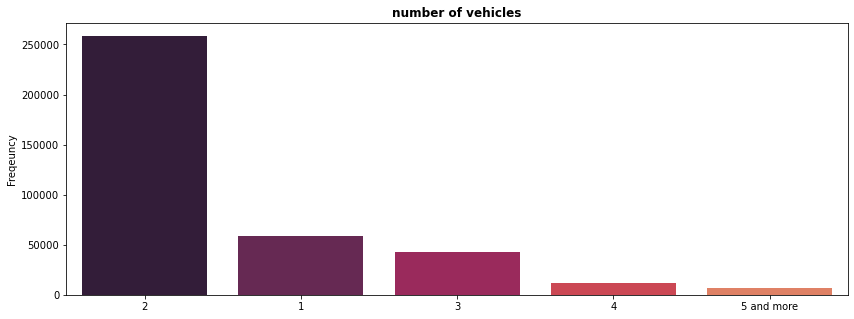

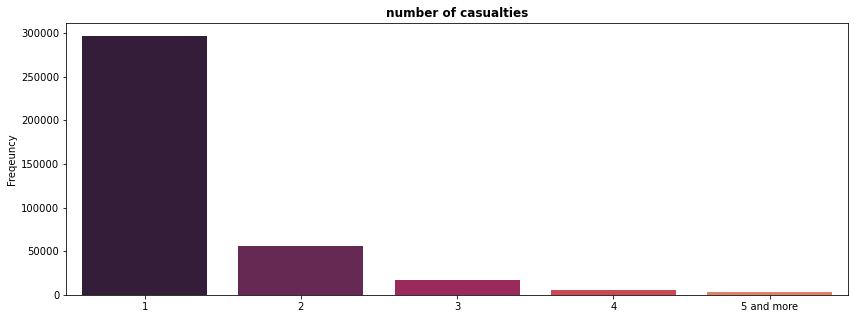

In [57]:
for column in ["number_of_vehicles", "number_of_casualties"]:
    var_value = combined_data_copy[column].value_counts()
    
    plt.figure(figsize=(14,5))
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
                palette = sns.color_palette("rocket"))    
    
    plt.title(" ".join(column.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.ticklabel_format(style='plain', axis='y')

In [58]:
data_plot1 = combined_data_copy[['accident_severity','urban_or_rural_area']]

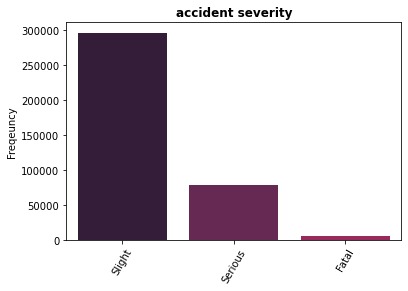

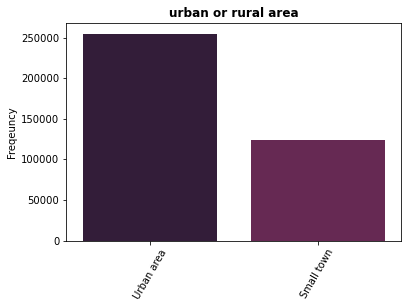

In [59]:
###ploting the categoricals
def plot_features(df):
    for feature in df.columns:
        var_value = df[feature].value_counts()
        #plt.figure(figsize=(8,6))
        plt.grid(False)
        sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
                    palette = sns.color_palette("rocket"))
        plt.title(" ".join(feature.split("_")), weight="bold")
        plt.ylabel("Freqeuncy")
        plt.xticks(rotation=60)
        plt.ticklabel_format(style='plain', axis='y')
        plt.show()
    
plot_features(data_plot1)

In [60]:
data_plot2 = combined_data_copy[['weather_conditions']]

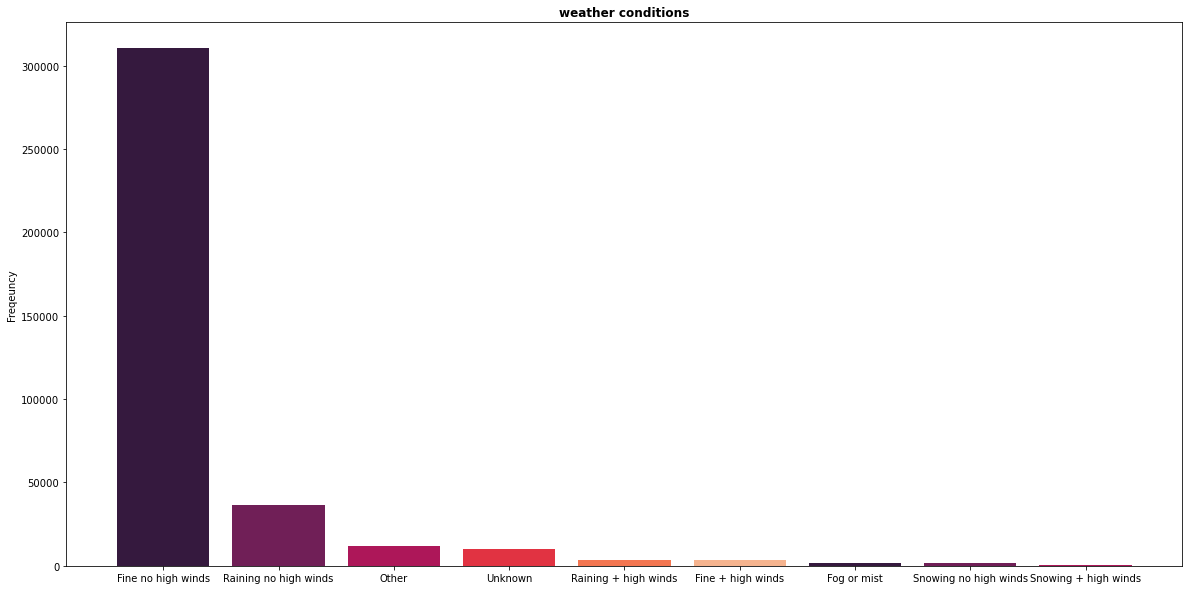

In [61]:
def plot_features(df):
    for feature in df.columns:
        var_value = df[feature].value_counts(ascending =False)
        plt.figure(figsize=(20,10))
        plt.grid(False)
        # sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
        #             palette = sns.color_palette("rocket"))
        plt.bar(var_value.index,var_value.values,
         color = sns.color_palette("rocket"))
        plt.title(" ".join(feature.split("_")), weight="bold")
        plt.ylabel("Freqeuncy")
        #plt.xticks(rotation=60)
        #plt.ticklabel_format(style='plain', axis='y')
        plt.show()
    
plot_features(data_plot2)

In [62]:
data_plot3 = combined_data_copy[['road_surface_conditions']]

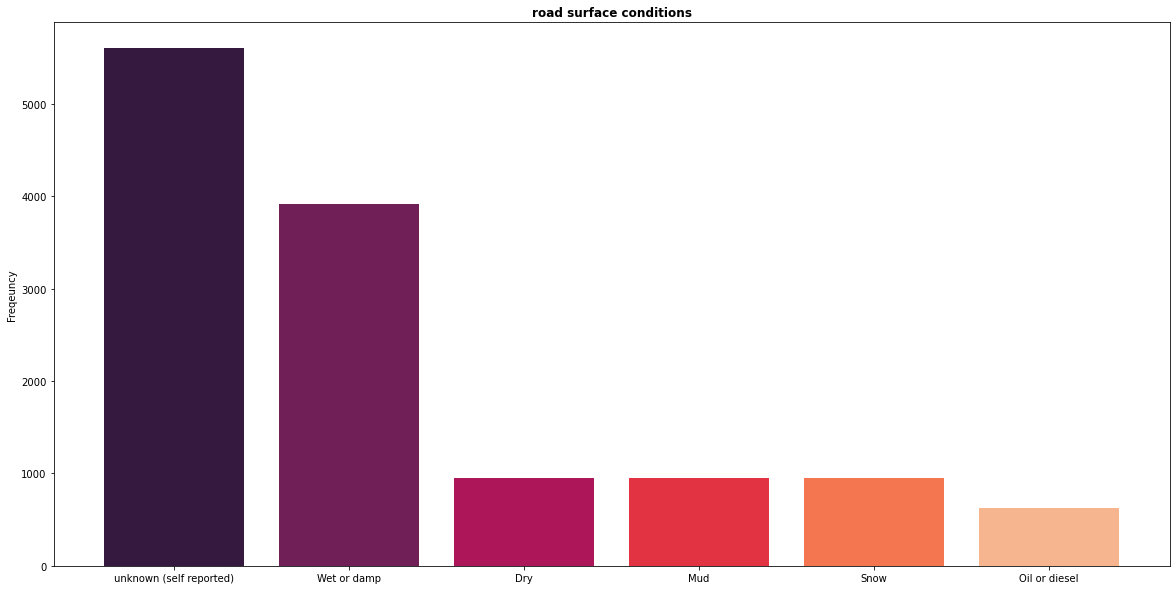

In [63]:
def plot_features(df):
    for feature in df.columns:
        var_value = df[feature].value_counts(ascending =False)
        plt.figure(figsize=(20,10))
        plt.grid(False)
        # sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
        #             palette = sns.color_palette("rocket"))
        plt.bar(var_value.index,var_value.values,
         color = sns.color_palette("rocket"))
        plt.title(" ".join(feature.split("_")), weight="bold")
        plt.ylabel("Freqeuncy")
        #plt.xticks(rotation=60)
        #plt.ticklabel_format(style='plain', axis='y')
        plt.show()
    
plot_features(data_plot3)

In [64]:
data_plot4 = combined_data_copy[['road_type','light_conditions']]

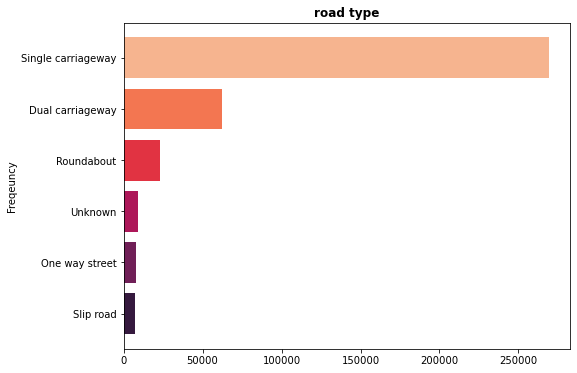

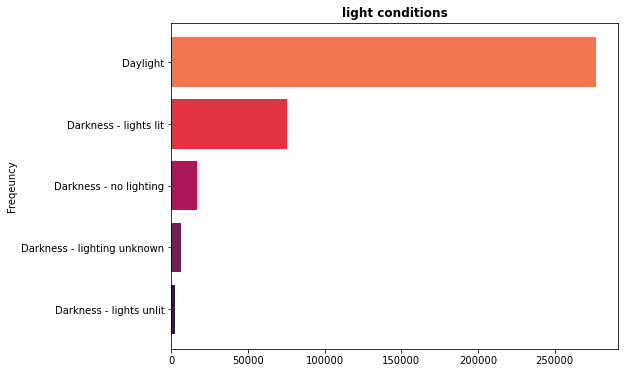

In [65]:
def plot_features(df):
    for feature in df.columns:
        var_value = df[feature].value_counts(ascending =True)
        plt.figure(figsize=(8,6))
        plt.grid(False)
        # sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
        #             palette = sns.color_palette("rocket"))
        plt.barh(var_value.index,var_value.values,
         color = sns.color_palette("rocket"))
        plt.title(" ".join(feature.split("_")), weight="bold")
        plt.ylabel("Freqeuncy")
        #plt.xticks(rotation=60)
        #plt.ticklabel_format(style='plain', axis='y')
        plt.show()
    
plot_features(data_plot4)

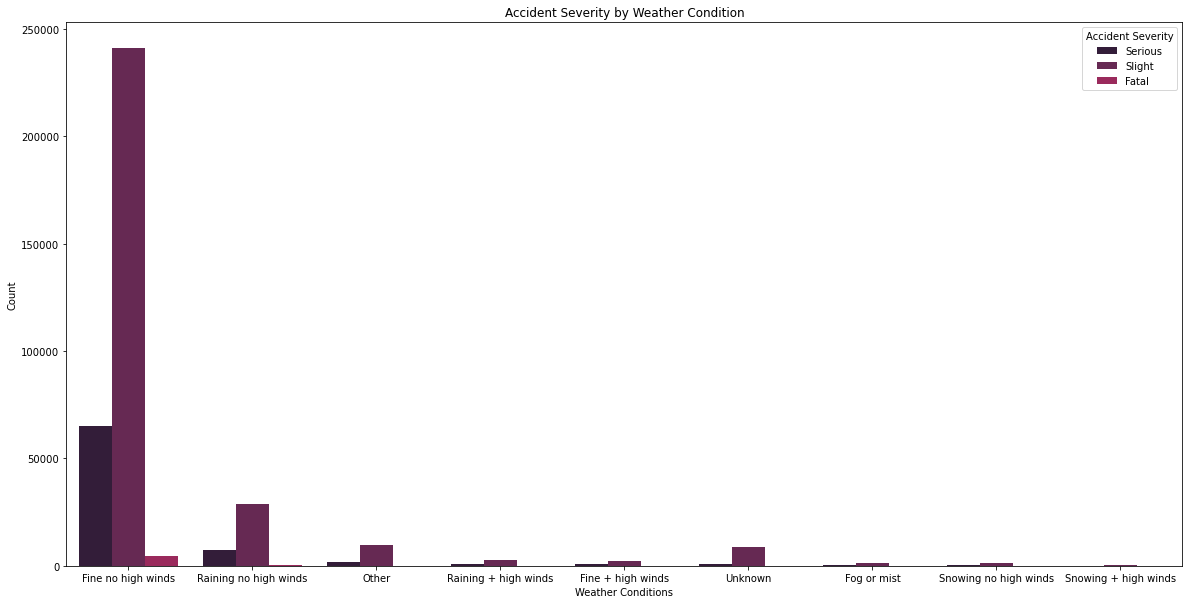

In [66]:
plt.figure(figsize=(20, 10))
sns.countplot(x='weather_conditions', hue='accident_severity', data=df_date, palette=sns.color_palette("rocket"))
plt.title('Accident Severity by Weather Condition')
plt.legend(title='Accident Severity', loc='upper right')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt



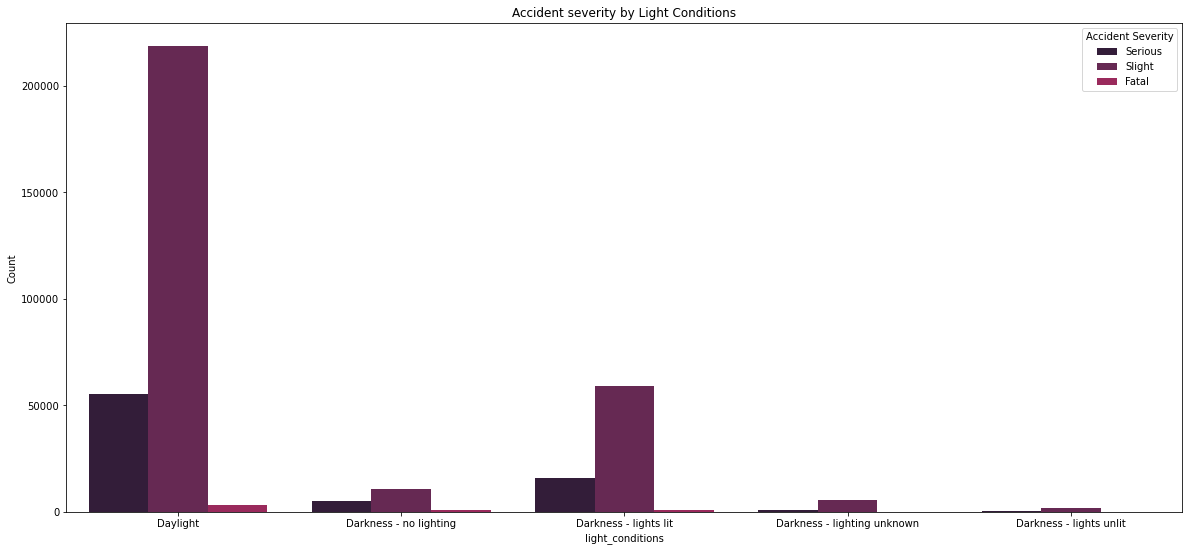

In [67]:
plt.figure(figsize=(20, 9))
sns.countplot(x='light_conditions', hue="accident_severity",data=df_date,palette = sns.color_palette("rocket"))

plt.title('Accident severity by Light Conditions')
plt.legend(title='Accident Severity', loc='upper right')
plt.xlabel('light_conditions')
plt.ylabel('Count')
plt.show()

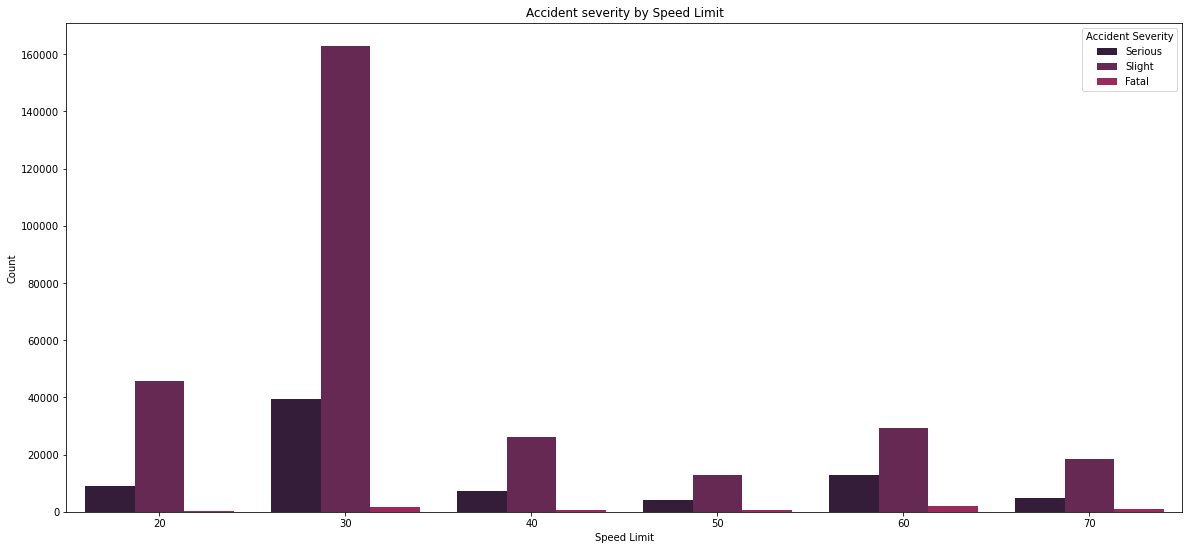

In [68]:

plt.figure(figsize=(20, 9))
sns.countplot(x='speed_limit', hue="accident_severity",data=df_date,palette = sns.color_palette("rocket"))
plt.title('Accident severity by Speed Limit')
plt.legend(title='Accident Severity', loc='upper right')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.show()


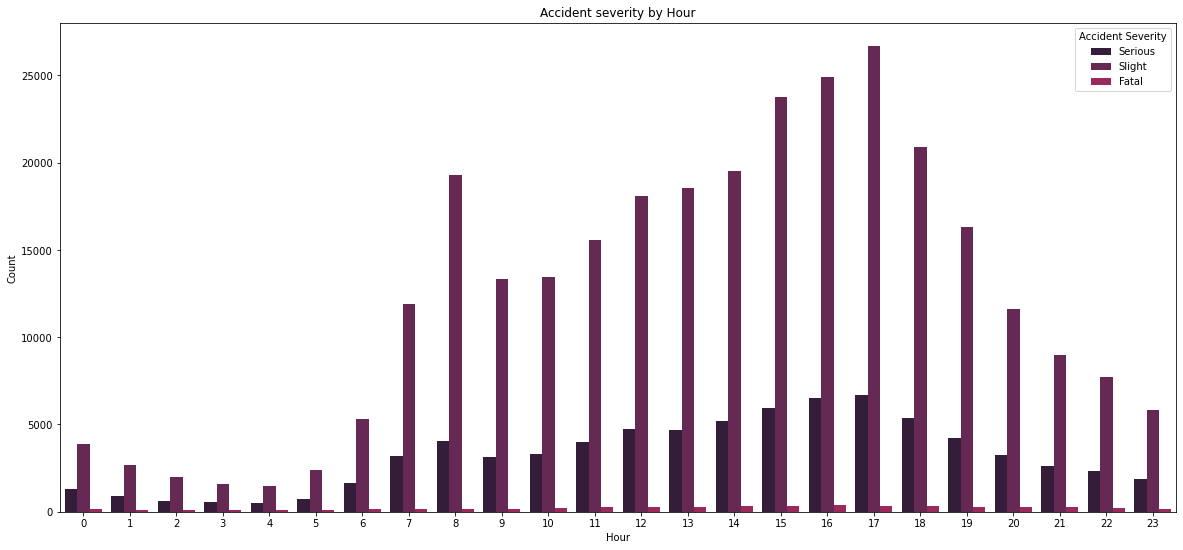

In [69]:
plt.figure(figsize=(20, 9))
sns.countplot(x='Hour', hue="accident_severity",data=df_date,palette = sns.color_palette("rocket"))
plt.title('Accident severity by Hour')
plt.legend(title='Accident Severity', loc='upper right')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


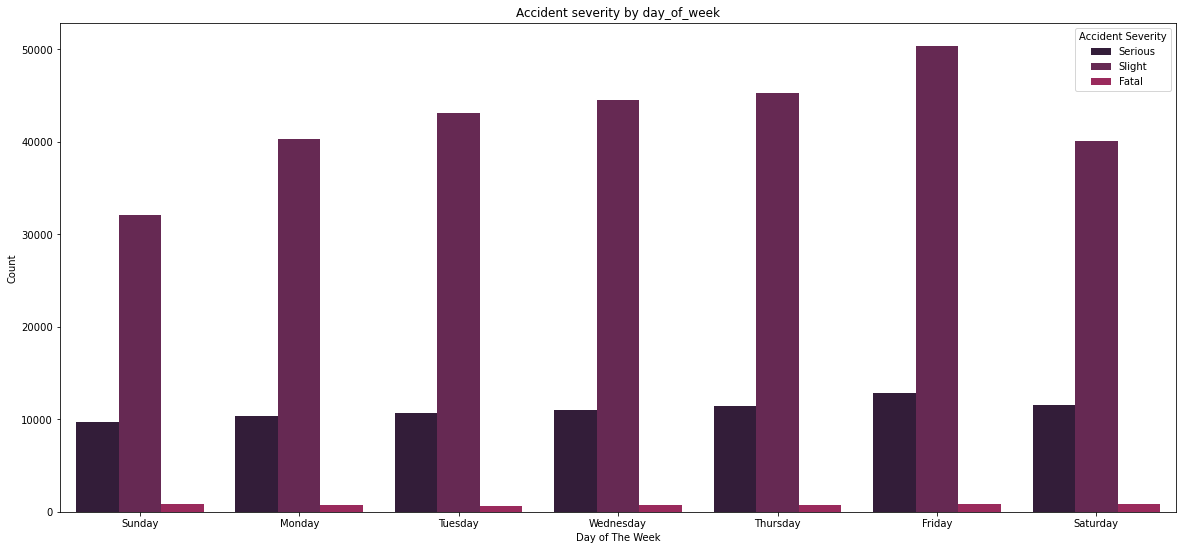

In [70]:
plt.figure(figsize=(20, 9))
sns.countplot(x='day_of_week', hue="accident_severity",data=df_date,palette = sns.color_palette("rocket"))
plt.title('Accident severity by day_of_week')
plt.legend(title='Accident Severity', loc='upper right')
plt.xlabel('Day of The Week')
plt.ylabel('Count')
plt.show()


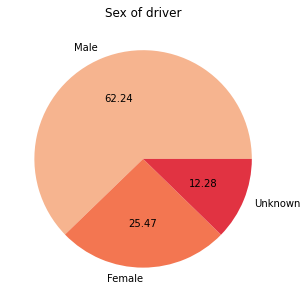

In [71]:
plt.figure(figsize=(20, 5))
plt.pie(combined_data_copy['sex_of_driver'].value_counts().values,
        labels = combined_data_copy['sex_of_driver'].value_counts().index,
         autopct = '%.2f', colors= sns.color_palette("rocket_r"))
plt.title('Sex of driver');



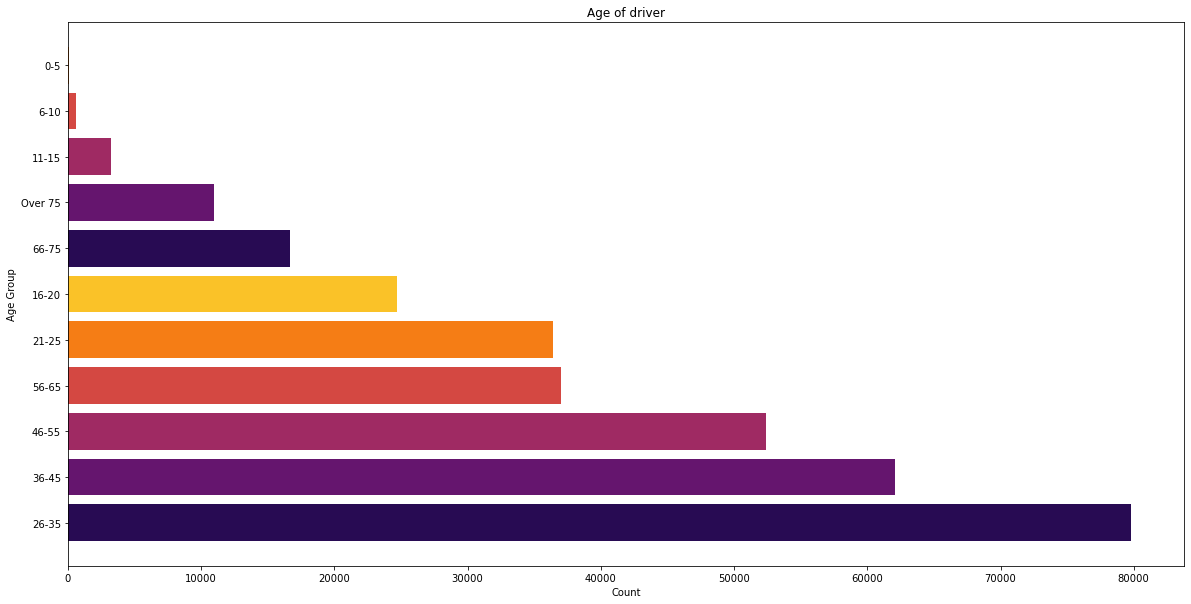

In [72]:
plt.figure(figsize=(20, 10))
plt.barh(combined_data_copy['age_band_of_driver'].value_counts().index,
        combined_data_copy['age_band_of_driver'].value_counts().values,
        color= sns.color_palette("inferno"))
plt.xlabel('Count')
plt.ylabel('Age Group')

plt.title('Age of driver');

Text(0.5, 1.0, 'Age of Vehicle')

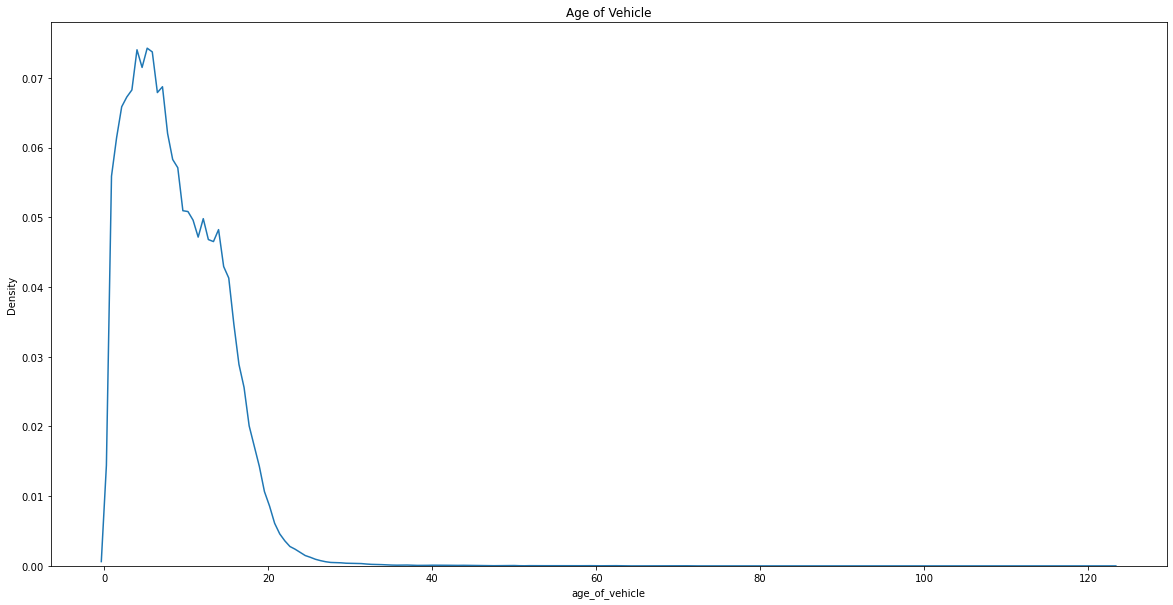

In [73]:
plt.figure(figsize=(20, 10))
sns.kdeplot(combined_data_copy['age_of_vehicle'])
plt.title('Age of Vehicle')

Text(0.5, 1.0, 'Age of Vehicle')

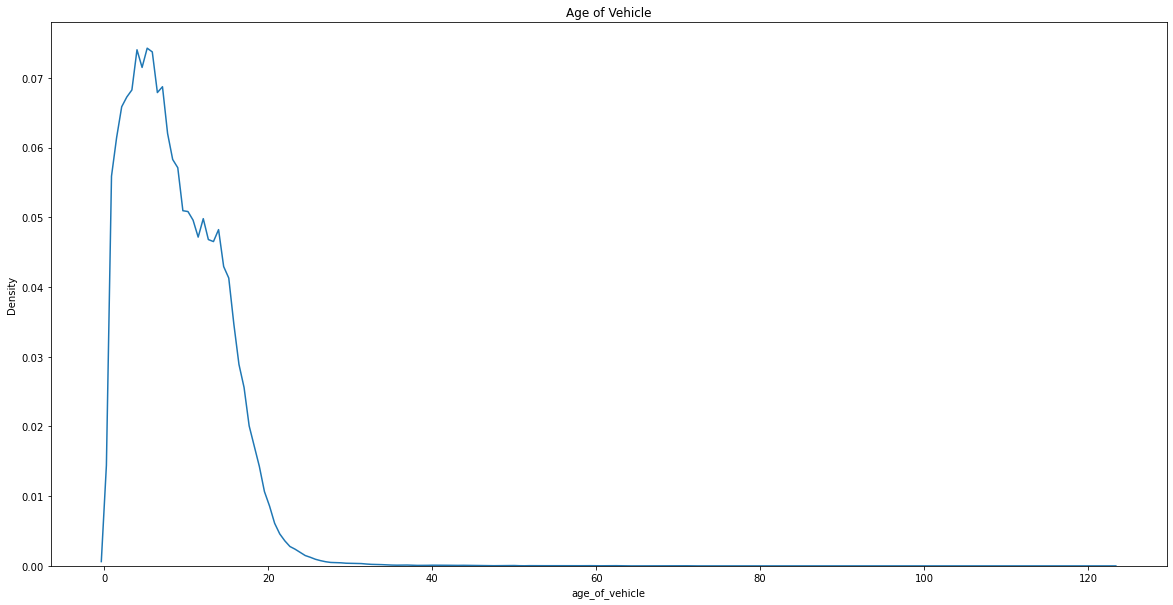

In [74]:
plt.figure(figsize=(20, 10))
sns.kdeplot(combined_data_copy['age_of_vehicle'])
plt.title('Age of Vehicle')

In [75]:
combined_data_copy['accident_severity'].value_counts()

Slight     295719
Serious     77537
Fatal        5453
Name: accident_severity, dtype: int64

### Modeling

In [76]:
combined_data_clean.columns

Index(['accident_index', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'road_type', 'speed_limit',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'carriageway_hazards', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident', 'sex_of_driver',
       'age_band_of_driver', 'vehicle_type', 'age_of_vehicle',
       'journey_purpose_of_driver'],
      dtype='object')

### ## checking for Percentage of Missing Values

In [77]:
## checking for mising
# count missing data
person_missing_count = combined_data_clean.isnull().sum().sort_values(ascending=False)
pd.DataFrame({'Percent Missing':person_missing_count/len(combined_data_clean)})

,Percent Missing
local_authority_district,1.000000
road_surface_conditions,0.965678
age_of_vehicle,0.258613
age_band_of_driver,0.144705
carriageway_hazards,0.005302
vehicle_type,0.000829
weather_conditions,0.000069
light_conditions,0.000063
sex_of_driver,0.000005
journey_purpose_of_driver,0.000005


### dropping columns that have high missing values

In [78]:
combined_data_model = combined_data_clean.drop(['accident_index','date', 'day_of_week','time','carriageway_hazards','journey_purpose_of_driver',
                                               'local_authority_district','road_surface_conditions',
                                               'road_surface_conditions','did_police_officer_attend_scene_of_accident','age_band_of_driver',
                                               'age_of_vehicle','urban_or_rural_area'],axis =1)

In [79]:
combined_data_model.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,light_conditions,weather_conditions,sex_of_driver,vehicle_type
0,1,3,3,1,6,30,4.0,7.0,1.0,9.0
1,1,3,3,1,6,30,4.0,7.0,3.0,9.0
2,1,3,3,1,6,30,4.0,7.0,3.0,9.0
3,1,2,2,3,3,30,4.0,1.0,1.0,9.0
4,1,2,2,3,3,30,4.0,1.0,1.0,9.0


### Removing Null Values

In [80]:
###removing the mising
combined_data_model.dropna(inplace =True)

In [81]:
combined_data_model.isnull().sum()

police_force            0
accident_severity       0
number_of_vehicles      0
number_of_casualties    0
road_type               0
speed_limit             0
light_conditions        0
weather_conditions      0
sex_of_driver           0
vehicle_type            0
dtype: int64

In [82]:
combined_data_model.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,light_conditions,weather_conditions,sex_of_driver,vehicle_type
0,1,3,3,1,6,30,4.0,7.0,1.0,9.0
1,1,3,3,1,6,30,4.0,7.0,3.0,9.0
2,1,3,3,1,6,30,4.0,7.0,3.0,9.0
3,1,2,2,3,3,30,4.0,1.0,1.0,9.0
4,1,2,2,3,3,30,4.0,1.0,1.0,9.0


### Extracting and standardizing numerical features

In [83]:
numerical_features = ['police_force','number_of_vehicles', 'number_of_casualties',
                      'speed_limit','vehicle_type']

In [84]:
scaler = StandardScaler()
combined_data_model[numerical_features] = scaler.fit_transform(combined_data_model[numerical_features])

### Creating Dummy Data

In [85]:
def prepare_data_for_model(raw_dataframe, target_columns,drop_first = True):
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe,columns=target_columns,
                                     drop_first=drop_first)
    return (dataframe_dummy)

# create dummy features 
combined_data_model = prepare_data_for_model(combined_data_model,
                                          target_columns=['road_type', 'light_conditions', 'weather_conditions', 'sex_of_driver']) 
list(combined_data_model)

['police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'speed_limit',
 'vehicle_type',
 'road_type_2',
 'road_type_3',
 'road_type_6',
 'road_type_7',
 'road_type_9',
 'light_conditions_4.0',
 'light_conditions_5.0',
 'light_conditions_6.0',
 'light_conditions_7.0',
 'weather_conditions_2.0',
 'weather_conditions_3.0',
 'weather_conditions_4.0',
 'weather_conditions_5.0',
 'weather_conditions_6.0',
 'weather_conditions_7.0',
 'weather_conditions_8.0',
 'weather_conditions_9.0',
 'sex_of_driver_2.0',
 'sex_of_driver_3.0']

In [86]:
combined_data_model.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,speed_limit,vehicle_type,road_type_2,road_type_3,road_type_6,road_type_7,...,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,weather_conditions_9.0,sex_of_driver_2.0,sex_of_driver_3.0
0,-1.090842,3,1.116530,-0.427559,-0.445196,-0.118029,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.090842,3,1.116530,-0.427559,-0.445196,-0.118029,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,-1.090842,3,1.116530,-0.427559,-0.445196,-0.118029,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,-1.090842,2,-0.104491,2.186282,-0.445196,-0.118029,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.090842,2,-0.104491,2.186282,-0.445196,-0.118029,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Spliting The Data

In [87]:
x = combined_data_model.drop('accident_severity', axis=1)
y = combined_data_model['accident_severity']

### Applying SMOTE

In [88]:
y

0         3
1         3
2         3
3         2
4         2
         ..
379907    2
379908    2
379909    3
379910    2
379911    2
Name: accident_severity, Length: 378362, dtype: int64

In [89]:
## Using SMOTE for the class imbalance in the target variable distribution using KNN
# RESAMPLED DATA
from imblearn.over_sampling import SMOTE
seed = 101
k = 1 
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = k, random_state = seed)
res_X, res_y = sm.fit_resample(x, y)
X_train,X_test,y_train,y_test = train_test_split(res_X, res_y,test_size=0.3,random_state=0)

### Random Forest

In [90]:
print(y_train.unique())
print(y_test.unique())

[3 2 1]
[3 1 2]


In [91]:
y_train[y_train ==1]= 0
y_train[y_train ==2]= 1
y_train[y_train ==3]= 2

In [92]:
y_test[y_test ==1]= 0
y_test[y_test ==2]= 1
y_test[y_test ==3]= 2

### Importing Random Forest Algorithm

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

### Hyperparameter Tunning

In [94]:
n_estimators = [25]
max_depth = [25]
min_samples_leaf = [2]
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

### Training the Model

In [95]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter=50, cv =2, verbose = 10, random_state=0, n_jobs = 10)
rf.fit(X_train, y_train)

RandomForestRegressor()

### Predicting with the Trained Model

In [96]:
y_pred_rf = rf.predict(X_test)
y_pred_rf = y_pred_rf.astype(int)

### Printing Classification Report

In [97]:
print('Random Forest Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_test, y_pred_rf,
                            target_names=['Fatal','Serious','Slight']))

Random Forest Model Classification Report 
 -----------------------------
Accuracy: 0.56
              precision    recall  f1-score   support

       Fatal       0.92      0.95      0.93     88783
     Serious       0.20      0.87      0.33     23280
      Slight       0.90      0.08      0.14     88446

    accuracy                           0.56    200509
   macro avg       0.67      0.63      0.47    200509
weighted avg       0.82      0.56      0.51    200509



### Generate the confusion matrix

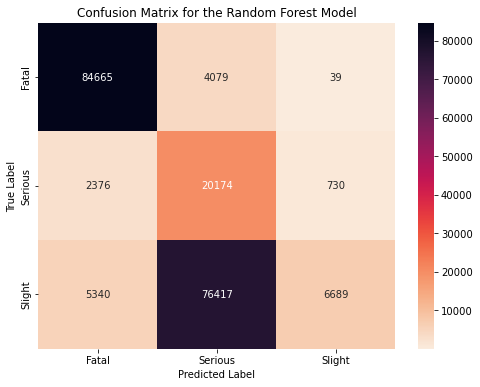

In [98]:
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="rocket_r", annot=True, fmt="d", xticklabels=['Fatal','Serious','Slight'],
            yticklabels=['Fatal','Serious','Slight'])
plt.title("Confusion Matrix for the Random Forest Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
#plt.savefig('confusion_matrix.png')

In [99]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


### LGBM Model

In [100]:
y[y==1]=0
y[y==2]=1
y[y==3]=2



In [101]:
y.unique()

array([2, 1, 0], dtype=int64)

In [102]:
import lightgbm as lgb

### SMOTE

In [103]:
## Using SMOTE for the class imbalance in the target variable distribution using KNN
from imblearn.over_sampling import SMOTE
seed = 101
k = 1 
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = k, random_state = seed)
res_X, res_y = sm.fit_resample(x, y)
X_train,X_test,y_train,y_test = train_test_split(res_X, res_y,test_size=0.3,random_state=0)

### Training the Data

In [104]:
X_train, X_val,y_train, y_val = train_test_split(res_X, res_y,
                                      random_state=0,
                                      test_size=0.30)
# Check the shape of both sets
X_train.shape, X_val.shape

((467853, 24), (200509, 24))

### Checking the Unique Data in the trained Data

In [105]:
y_train.unique()

array([2, 1, 0], dtype=int64)

### Setting the Parameters For training

In [106]:
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'verbose': 0
}

#Create a LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

### Training the Model

In [107]:
num_round = 150
evals={}
model = lgb.train(params,
                  train_data,
                  num_round,
                  valid_sets=[valid_data],
                 callbacks = [lgb.record_evaluation(evals)])

### Getting the model predictions

In [108]:
y_pred = model.predict(X_val,num_iteration=model.best_iteration)
y_pred.shape
y_pred[:3]

array([[0.00380837, 0.07804714, 0.91814449],
       [0.13097969, 0.165701  , 0.70331931],
       [0.7591745 , 0.11580386, 0.12502164]])

In [109]:
# Mapping probabilities to find the class
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int64)

### Get the accuracy score for the prediction values

In [110]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7780548504057174


### Printing Classification Report

In [111]:
print('Light XGBoost Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_val, y_pred,
                            target_names=['Fatal','Serious','Slight']))

Light XGBoost Model Classification Report 
 -----------------------------
Accuracy: 0.78
              precision    recall  f1-score   support

       Fatal       0.82      0.88      0.85     88783
     Serious       0.53      0.02      0.04     23280
      Slight       0.74      0.87      0.80     88446

    accuracy                           0.78    200509
   macro avg       0.70      0.59      0.57    200509
weighted avg       0.75      0.78      0.74    200509



### Generating Confusion Matrix

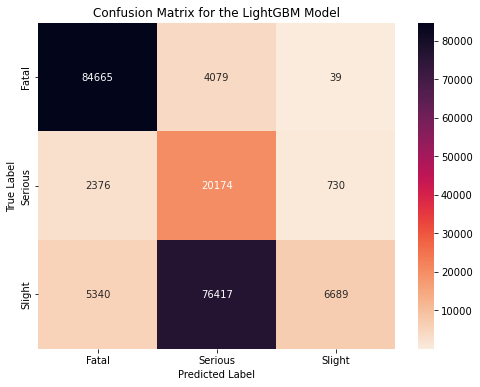

In [112]:
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="rocket_r", annot=True, fmt="d", xticklabels=['Fatal','Serious','Slight'],
            yticklabels=['Fatal','Serious','Slight'])
plt.title("Confusion Matrix for the LightGBM Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");


### LSTM Model

In [83]:
x = combined_data_model.drop('accident_severity', axis=1)
y = combined_data_model['accident_severity']

In [84]:
## resetting index
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [86]:
y

0         3
1         3
2         3
3         2
4         2
         ..
378357    2
378358    2
378359    3
378360    2
378361    2
Name: accident_severity, Length: 378362, dtype: int64

### Selecting samples for each class for training

In [87]:
label_class1 = np.where(y == 1)[0][:10000]
label_class2 = np.where(y == 2)[0][:20000]
label_class3 = np.where(y == 3)[0][:100000]

In [88]:
##Combining the selected samples
selected_labels = np.concatenate([label_class1, label_class2, label_class3])

In [89]:
# Creating training set
x_data = x.iloc[selected_labels,:]
y_data = y[selected_labels]

In [90]:
y

0         3
1         3
2         3
3         2
4         2
         ..
378357    2
378358    2
378359    3
378360    2
378361    2
Name: accident_severity, Length: 378362, dtype: int64

In [91]:
y_data.value_counts()

accident_severity
3    100000
2     20000
1      5445
Name: count, dtype: int64

In [92]:
print(len(x.iloc[selected_labels,:]))
print(len(y[selected_labels]))

125445
125445


### Applying SMOTE

In [93]:
from imblearn.over_sampling import SMOTE
seed = 101
k = 1 
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = k, random_state = seed)
res_X, res_y = sm.fit_resample(x_data, y_data)
X_train,X_test,y_train,y_test = train_test_split(res_X, res_y,test_size=0.3,random_state=0)

In [94]:
print(len(y_train==1))
print(len(y_train==2))
print(len(y_train==3))
print(len(X_train))

154000
154000
154000
154000


In [95]:
x_train = np.asarray(X_train).astype('float32')
x_test = np.asarray(X_test).astype('float32')

In [96]:
x_train = np.asarray(X_train).astype('float32')
x_test = np.asarray(X_test).astype('float32')

In [97]:
x_train = x_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test = x_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [98]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [99]:
###Reshaping the input
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [100]:
### encding y label
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)

In [101]:
y_test = encoder.transform(y_test)

In [102]:
y_test.shape

(66000, 3)

In [103]:
n_timesteps, n_features, n_outputs = x_train.shape[1],x_train.shape[2],3

In [104]:
print(n_timesteps)
print(n_features)
print(n_outputs)

24
1
3


### Importing Libraries for Deep Learning

In [105]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Add, BatchNormalization
import tensorflow as tf

# Assuming n_timesteps and n_features are defined
n_outputs = 3  # Number of output classes

# Define the input layer
input_layer = Input(shape=(n_timesteps, 1))

# First convolutional block with batch normalization
conv1 = Conv1D(filters=128, kernel_size=2, activation='relu')(input_layer)
# conv1 = BatchNormalization()(conv1)
print('First conv1 layer : ', conv1.shape)

# Second convolutional block with batch normalization
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(conv1)
# conv2 = BatchNormalization()(conv2)
print('Second conv2 layer : ', conv2.shape)

pool1 = MaxPooling1D(pool_size=2)(conv2)
print('pool1 : ', pool1.shape)

# First LSTM block
lstm1 = LSTM(32, return_sequences=True)(pool1)
print('First LSTM layer : ', lstm1.shape)

# Second LSTM block with a skip connection
lstm2 = LSTM(32, return_sequences=True)(pool1)  # Skip connection to the first LSTM block
print('Second LSTM layer : ', lstm2.shape)

combined_lstm = Add()([lstm1, lstm2])
combined_lstm = BatchNormalization()(combined_lstm)


# Dense layers
dense1 = Dense(100, activation='relu')(combined_lstm)
flatten1 = Flatten()(dense1)
output_layer = Dense(n_outputs, activation='softmax')(flatten1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

First conv1 layer :  (None, 23, 128)
Second conv2 layer :  (None, 22, 64)
pool1 :  (None, 11, 64)
First LSTM layer :  (None, 11, 32)
Second LSTM layer :  (None, 11, 32)


In [106]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 23, 128)      384         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 22, 64)       16448       ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 11, 64)       0           ['conv1d_1[0][0]']               
                                                                                              

In [107]:
## Compiling the model train
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

In [108]:
# Define the ModelCheckpoint callback
checkpoint_filepath ='C:\\Users\\Ojumu PC'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  
    mode='max', 
)

### Train your model with the ModelCheckpoint callback

In [109]:
y

0         3
1         3
2         3
3         2
4         2
         ..
378357    2
378358    2
378359    3
378360    2
378361    2
Name: accident_severity, Length: 378362, dtype: int64

In [110]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=100, 
    validation_data=(x_test, y_test),
    callbacks=[model_checkpoint_callback]  
)

Epoch 1/100
1204/1204 [==============================] - ETA: 0s - loss: 0.6515 - accuracy: 0.7330

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 111s 85ms/step - loss: 0.6515 - accuracy: 0.7330 - val_loss: 0.6431 - val_accuracy: 0.7309
Epoch 2/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.6217 - accuracy: 0.7456

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 98s 82ms/step - loss: 0.6217 - accuracy: 0.7456 - val_loss: 0.6434 - val_accuracy: 0.7424
Epoch 3/100
1204/1204 [==============================] - 63s 52ms/step - loss: 0.6089 - accuracy: 0.7512 - val_loss: 0.6268 - val_accuracy: 0.7411
Epoch 4/100
1204/1204 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.7549

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 99s 82ms/step - loss: 0.6005 - accuracy: 0.7549 - val_loss: 0.6300 - val_accuracy: 0.7452
Epoch 5/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.5932 - accuracy: 0.7581

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 99s 82ms/step - loss: 0.5932 - accuracy: 0.7581 - val_loss: 0.5999 - val_accuracy: 0.7529
Epoch 6/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.5868 - accuracy: 0.7612

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 98s 82ms/step - loss: 0.5868 - accuracy: 0.7612 - val_loss: 0.5979 - val_accuracy: 0.7538
Epoch 7/100
1204/1204 [==============================] - ETA: 0s - loss: 0.5820 - accuracy: 0.7633

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 97s 80ms/step - loss: 0.5820 - accuracy: 0.7633 - val_loss: 0.5958 - val_accuracy: 0.7572
Epoch 8/100
1204/1204 [==============================] - 62s 52ms/step - loss: 0.5764 - accuracy: 0.7656 - val_loss: 0.5906 - val_accuracy: 0.7556
Epoch 9/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.5733 - accuracy: 0.7665

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 97s 81ms/step - loss: 0.5733 - accuracy: 0.7665 - val_loss: 0.5736 - val_accuracy: 0.7667
Epoch 10/100
1204/1204 [==============================] - ETA: 0s - loss: 0.5673 - accuracy: 0.7700

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 98s 81ms/step - loss: 0.5673 - accuracy: 0.7700 - val_loss: 0.5663 - val_accuracy: 0.7692
Epoch 11/100
1204/1204 [==============================] - 66s 55ms/step - loss: 0.5635 - accuracy: 0.7710 - val_loss: 0.5959 - val_accuracy: 0.7632
Epoch 12/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.5589 - accuracy: 0.7736

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 100s 83ms/step - loss: 0.5589 - accuracy: 0.7736 - val_loss: 0.5634 - val_accuracy: 0.7705
Epoch 13/100
1204/1204 [==============================] - 63s 52ms/step - loss: 0.5538 - accuracy: 0.7761 - val_loss: 0.5721 - val_accuracy: 0.7698
Epoch 14/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.5503 - accuracy: 0.7776

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 98s 81ms/step - loss: 0.5503 - accuracy: 0.7776 - val_loss: 0.5589 - val_accuracy: 0.7715
Epoch 15/100
1204/1204 [==============================] - 63s 52ms/step - loss: 0.5469 - accuracy: 0.7792 - val_loss: 0.5773 - val_accuracy: 0.7621
Epoch 16/100
1204/1204 [==============================] - 64s 53ms/step - loss: 0.5431 - accuracy: 0.7813 - val_loss: 0.5764 - val_accuracy: 0.7627
Epoch 17/100
1204/1204 [==============================] - ETA: 0s - loss: 0.5396 - accuracy: 0.7828

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 112s 93ms/step - loss: 0.5396 - accuracy: 0.7828 - val_loss: 0.5560 - val_accuracy: 0.7769
Epoch 18/100
1204/1204 [==============================] - 71s 59ms/step - loss: 0.5364 - accuracy: 0.7837 - val_loss: 0.5670 - val_accuracy: 0.7694
Epoch 19/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7864

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 105s 87ms/step - loss: 0.5326 - accuracy: 0.7864 - val_loss: 0.5351 - val_accuracy: 0.7836
Epoch 20/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.5303 - accuracy: 0.7871 - val_loss: 0.5426 - val_accuracy: 0.7816
Epoch 21/100
1204/1204 [==============================] - 66s 55ms/step - loss: 0.5262 - accuracy: 0.7888 - val_loss: 0.5355 - val_accuracy: 0.7835
Epoch 22/100
1204/1204 [==============================] - 67s 55ms/step - loss: 0.5228 - accuracy: 0.7910 - val_loss: 0.5814 - val_accuracy: 0.7655
Epoch 23/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.5202 - accuracy: 0.7921

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 102s 85ms/step - loss: 0.5202 - accuracy: 0.7921 - val_loss: 0.5313 - val_accuracy: 0.7900
Epoch 24/100
1204/1204 [==============================] - 67s 56ms/step - loss: 0.5179 - accuracy: 0.7928 - val_loss: 0.5360 - val_accuracy: 0.7897
Epoch 25/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.5134 - accuracy: 0.7949 - val_loss: 0.5379 - val_accuracy: 0.7837
Epoch 26/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.5122 - accuracy: 0.7956 - val_loss: 0.5548 - val_accuracy: 0.7798
Epoch 27/100
1204/1204 [==============================] - ETA: 0s - loss: 0.5099 - accuracy: 0.7968

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 103s 86ms/step - loss: 0.5099 - accuracy: 0.7968 - val_loss: 0.5306 - val_accuracy: 0.7926
Epoch 28/100
1204/1204 [==============================] - 67s 55ms/step - loss: 0.5068 - accuracy: 0.7983 - val_loss: 0.5335 - val_accuracy: 0.7876
Epoch 29/100
1204/1204 [==============================] - ETA: 0s - loss: 0.5039 - accuracy: 0.7987

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 101s 84ms/step - loss: 0.5039 - accuracy: 0.7987 - val_loss: 0.5116 - val_accuracy: 0.7963
Epoch 30/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.5013 - accuracy: 0.8001 - val_loss: 0.5284 - val_accuracy: 0.7914
Epoch 31/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4991 - accuracy: 0.8011

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 103s 85ms/step - loss: 0.4991 - accuracy: 0.8011 - val_loss: 0.5123 - val_accuracy: 0.7980
Epoch 32/100
1204/1204 [==============================] - ETA: 0s - loss: 0.4969 - accuracy: 0.8024

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 103s 85ms/step - loss: 0.4969 - accuracy: 0.8024 - val_loss: 0.5048 - val_accuracy: 0.8015
Epoch 33/100
1204/1204 [==============================] - 67s 56ms/step - loss: 0.4939 - accuracy: 0.8028 - val_loss: 0.5028 - val_accuracy: 0.7998
Epoch 34/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4927 - accuracy: 0.8042

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 103s 86ms/step - loss: 0.4927 - accuracy: 0.8042 - val_loss: 0.5010 - val_accuracy: 0.8051
Epoch 35/100
1204/1204 [==============================] - 66s 55ms/step - loss: 0.4895 - accuracy: 0.8052 - val_loss: 0.4964 - val_accuracy: 0.8028
Epoch 36/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.4879 - accuracy: 0.8061 - val_loss: 0.5320 - val_accuracy: 0.7838
Epoch 37/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.4863 - accuracy: 0.8069 - val_loss: 0.4983 - val_accuracy: 0.8037
Epoch 38/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.4838 - accuracy: 0.8079 - val_loss: 0.5054 - val_accuracy: 0.7966
Epoch 39/100
1204/1204 [==============================] - ETA: 0s - loss: 0.4825 - accuracy: 0.8087

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 104s 86ms/step - loss: 0.4825 - accuracy: 0.8087 - val_loss: 0.4900 - val_accuracy: 0.8057
Epoch 40/100
1204/1204 [==============================] - ETA: 0s - loss: 0.4803 - accuracy: 0.8100

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 99s 83ms/step - loss: 0.4803 - accuracy: 0.8100 - val_loss: 0.4895 - val_accuracy: 0.8075
Epoch 41/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.4775 - accuracy: 0.8105 - val_loss: 0.4993 - val_accuracy: 0.7996
Epoch 42/100
1204/1204 [==============================] - ETA: 0s - loss: 0.4769 - accuracy: 0.8107

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 100s 83ms/step - loss: 0.4769 - accuracy: 0.8107 - val_loss: 0.4892 - val_accuracy: 0.8090
Epoch 43/100
1204/1204 [==============================] - 66s 55ms/step - loss: 0.4753 - accuracy: 0.8112 - val_loss: 0.5202 - val_accuracy: 0.7969
Epoch 44/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4732 - accuracy: 0.8125

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 103s 86ms/step - loss: 0.4732 - accuracy: 0.8125 - val_loss: 0.4888 - val_accuracy: 0.8094
Epoch 45/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.4715 - accuracy: 0.8133 - val_loss: 0.4991 - val_accuracy: 0.7973
Epoch 46/100
1204/1204 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.8132

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 101s 84ms/step - loss: 0.4708 - accuracy: 0.8132 - val_loss: 0.4801 - val_accuracy: 0.8130
Epoch 47/100
1204/1204 [==============================] - 65s 54ms/step - loss: 0.4673 - accuracy: 0.8150 - val_loss: 0.4869 - val_accuracy: 0.8082
Epoch 48/100
1204/1204 [==============================] - 67s 56ms/step - loss: 0.4671 - accuracy: 0.8152 - val_loss: 0.4873 - val_accuracy: 0.8090
Epoch 49/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4662 - accuracy: 0.8158

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 102s 84ms/step - loss: 0.4662 - accuracy: 0.8158 - val_loss: 0.4768 - val_accuracy: 0.8143
Epoch 50/100
1204/1204 [==============================] - 67s 55ms/step - loss: 0.4650 - accuracy: 0.8160 - val_loss: 0.4794 - val_accuracy: 0.8101
Epoch 51/100
1204/1204 [==============================] - 68s 56ms/step - loss: 0.4633 - accuracy: 0.8173 - val_loss: 0.4847 - val_accuracy: 0.8093
Epoch 52/100
1204/1204 [==============================] - 70s 58ms/step - loss: 0.4613 - accuracy: 0.8173 - val_loss: 0.4811 - val_accuracy: 0.8140
Epoch 53/100
1204/1204 [==============================] - 70s 58ms/step - loss: 0.4607 - accuracy: 0.8170 - val_loss: 0.4858 - val_accuracy: 0.8110
Epoch 54/100
1204/1204 [==============================] - 72s 59ms/step - loss: 0.4595 - accuracy: 0.8181 - val_loss: 0.4810 - val_accuracy: 0.8111
Epoch 55/100
1204/1204 [==============================] - 71s 59ms/step - loss: 0.4572 - accuracy: 0.8190 - val_loss: 0.4785

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 109s 91ms/step - loss: 0.4529 - accuracy: 0.8209 - val_loss: 0.4674 - val_accuracy: 0.8182
Epoch 60/100
1204/1204 [==============================] - 70s 58ms/step - loss: 0.4520 - accuracy: 0.8215 - val_loss: 0.4665 - val_accuracy: 0.8167
Epoch 61/100
1204/1204 [==============================] - 68s 56ms/step - loss: 0.4504 - accuracy: 0.8221 - val_loss: 0.4758 - val_accuracy: 0.8119
Epoch 62/100
1204/1204 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.8221

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 104s 86ms/step - loss: 0.4494 - accuracy: 0.8221 - val_loss: 0.4637 - val_accuracy: 0.8208
Epoch 63/100
1204/1204 [==============================] - 71s 59ms/step - loss: 0.4475 - accuracy: 0.8234 - val_loss: 0.4731 - val_accuracy: 0.8148
Epoch 64/100
1204/1204 [==============================] - 72s 60ms/step - loss: 0.4462 - accuracy: 0.8230 - val_loss: 0.4695 - val_accuracy: 0.8155
Epoch 65/100
1204/1204 [==============================] - 72s 60ms/step - loss: 0.4452 - accuracy: 0.8244 - val_loss: 0.4648 - val_accuracy: 0.8207
Epoch 66/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4458 - accuracy: 0.8231

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 113s 94ms/step - loss: 0.4457 - accuracy: 0.8231 - val_loss: 0.4630 - val_accuracy: 0.8221
Epoch 67/100
1204/1204 [==============================] - 72s 60ms/step - loss: 0.4437 - accuracy: 0.8244 - val_loss: 0.4689 - val_accuracy: 0.8167
Epoch 68/100
1204/1204 [==============================] - 72s 60ms/step - loss: 0.4429 - accuracy: 0.8251 - val_loss: 0.4610 - val_accuracy: 0.8167
Epoch 69/100
1204/1204 [==============================] - 74s 62ms/step - loss: 0.4430 - accuracy: 0.8246 - val_loss: 0.4648 - val_accuracy: 0.8183
Epoch 70/100
1204/1204 [==============================] - 74s 62ms/step - loss: 0.4416 - accuracy: 0.8257 - val_loss: 0.4662 - val_accuracy: 0.8183
Epoch 72/100
1204/1204 [==============================] - 72s 60ms/step - loss: 0.4394 - accuracy: 0.8261 - val_loss: 0.4597 - val_accuracy: 0.8195
Epoch 73/100
1204/1204 [==============================] - ETA: 0s - loss: 0.4387 - accuracy: 0.8266

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 118s 98ms/step - loss: 0.4387 - accuracy: 0.8266 - val_loss: 0.4573 - val_accuracy: 0.8225
Epoch 74/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4369 - accuracy: 0.8278

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 108s 90ms/step - loss: 0.4369 - accuracy: 0.8278 - val_loss: 0.4533 - val_accuracy: 0.8254
Epoch 75/100
1204/1204 [==============================] - 68s 56ms/step - loss: 0.4370 - accuracy: 0.8273 - val_loss: 0.4562 - val_accuracy: 0.8226
Epoch 76/100
1204/1204 [==============================] - 67s 56ms/step - loss: 0.4358 - accuracy: 0.8277 - val_loss: 0.4536 - val_accuracy: 0.8230
Epoch 77/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.8277

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 107s 89ms/step - loss: 0.4348 - accuracy: 0.8277 - val_loss: 0.4498 - val_accuracy: 0.8263
Epoch 78/100
1204/1204 [==============================] - 72s 60ms/step - loss: 0.4340 - accuracy: 0.8284 - val_loss: 0.4615 - val_accuracy: 0.8192
Epoch 79/100
1204/1204 [==============================] - 75s 62ms/step - loss: 0.4324 - accuracy: 0.8288 - val_loss: 0.4582 - val_accuracy: 0.8191
Epoch 80/100
1204/1204 [==============================] - 75s 62ms/step - loss: 0.4326 - accuracy: 0.8294 - val_loss: 0.4654 - val_accuracy: 0.8209
Epoch 81/100
1204/1204 [==============================] - 75s 62ms/step - loss: 0.4320 - accuracy: 0.8295 - val_loss: 0.4572 - val_accuracy: 0.8236
Epoch 82/100
1204/1204 [==============================] - 76s 63ms/step - loss: 0.4318 - accuracy: 0.8293 - val_loss: 0.4597 - val_accuracy: 0.8229
Epoch 83/100
1204/1204 [==============================] - 76s 63ms/step - loss: 0.4301 - accuracy: 0.8297 - val_loss: 0.4626

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 118s 98ms/step - loss: 0.4262 - accuracy: 0.8309 - val_loss: 0.4503 - val_accuracy: 0.8267
Epoch 88/100
1204/1204 [==============================] - 70s 59ms/step - loss: 0.4272 - accuracy: 0.8306 - val_loss: 0.4631 - val_accuracy: 0.8202
Epoch 89/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8312

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 110s 91ms/step - loss: 0.4262 - accuracy: 0.8312 - val_loss: 0.4511 - val_accuracy: 0.8273
Epoch 90/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4253 - accuracy: 0.8315

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 108s 90ms/step - loss: 0.4254 - accuracy: 0.8315 - val_loss: 0.4429 - val_accuracy: 0.8288
Epoch 91/100
1204/1204 [==============================] - 68s 57ms/step - loss: 0.4244 - accuracy: 0.8321 - val_loss: 0.4553 - val_accuracy: 0.8245
Epoch 92/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4231 - accuracy: 0.8316

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 104s 86ms/step - loss: 0.4231 - accuracy: 0.8316 - val_loss: 0.4422 - val_accuracy: 0.8298
Epoch 93/100
1204/1204 [==============================] - 68s 57ms/step - loss: 0.4234 - accuracy: 0.8324 - val_loss: 0.4442 - val_accuracy: 0.8274
Epoch 94/100
1204/1204 [==============================] - 74s 61ms/step - loss: 0.4225 - accuracy: 0.8324 - val_loss: 0.4486 - val_accuracy: 0.8241
Epoch 95/100
1203/1204 [============================>.] - ETA: 0s - loss: 0.4212 - accuracy: 0.8337

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


1204/1204 [==============================] - 110s 91ms/step - loss: 0.4212 - accuracy: 0.8337 - val_loss: 0.4394 - val_accuracy: 0.8300
Epoch 96/100
1204/1204 [==============================] - 74s 62ms/step - loss: 0.4207 - accuracy: 0.8339 - val_loss: 0.4461 - val_accuracy: 0.8245
Epoch 97/100
1204/1204 [==============================] - 77s 64ms/step - loss: 0.4204 - accuracy: 0.8340 - val_loss: 0.4524 - val_accuracy: 0.8253
Epoch 98/100
1204/1204 [==============================] - 77s 64ms/step - loss: 0.4204 - accuracy: 0.8327 - val_loss: 0.4397 - val_accuracy: 0.8300
Epoch 99/100
1204/1204 [==============================] - 77s 64ms/step - loss: 0.4182 - accuracy: 0.8343 - val_loss: 0.4461 - val_accuracy: 0.8268
Epoch 100/100
1204/1204 [==============================] - 78s 65ms/step - loss: 0.4198 - accuracy: 0.8337 - val_loss: 0.4431 - val_accuracy: 0.8269


In [111]:
model.evaluate(x_test,y_test)

2063/2063 [==============================] - 21s 10ms/step - loss: 0.4431 - accuracy: 0.8269


[0.4430946111679077, 0.8268636465072632]

In [112]:
model.evaluate(x_train,y_train)

4813/4813 [==============================] - 49s 10ms/step - loss: 0.4127 - accuracy: 0.8364


[0.4126611649990082, 0.8364025950431824]

##### Using the Model to Predict

In [113]:
y_pred_labels = model.predict(x_test)
lstm_y_pred  = np.argmax(y_pred_labels,axis=1)

2063/2063 [==============================] - 22s 10ms/step


In [114]:
y_true = np.argmax(y_test,axis=1)

### calculating the F1-score, precision, and recall

In [115]:
f1score = f1_score(y_true, lstm_y_pred,average='weighted')
precision = precision_score(y_true, lstm_y_pred,average='weighted')
recall = recall_score(y_true, lstm_y_pred,average='weighted')
accuracy = accuracy_score(y_true,lstm_y_pred)

In [116]:
print('F1-score: {:.2f}'.format(f1score))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('Accuracy: {:.2f}'.format(accuracy))

F1-score: 0.80
Precision: 0.80
Recall: 0.83
Accuracy: 0.83


### Printing Classification Report

In [117]:
print('LSTM Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_true,lstm_y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_true, lstm_y_pred,
                            target_names=['Fatal','Serious','Slight']))

LSTM Model Classification Report 
 -----------------------------
Accuracy: 0.83
              precision    recall  f1-score   support

       Fatal       0.88      0.91      0.90     30064
     Serious       0.46      0.07      0.12      5945
      Slight       0.79      0.89      0.84     29991

    accuracy                           0.83     66000
   macro avg       0.71      0.62      0.62     66000
weighted avg       0.80      0.83      0.80     66000



### Generating Confusion Matrix

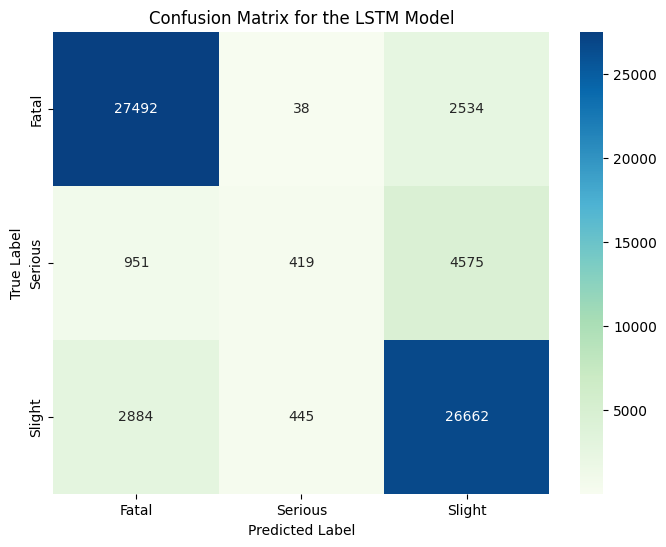

In [118]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_true, lstm_y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="GnBu", annot=True, fmt="d", xticklabels=['Fatal','Serious','Slight'],
            yticklabels=['Fatal','Serious','Slight'])
plt.title("Confusion Matrix for the LSTM Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
#plt.savefig('confusion_matrix.png')